In [10]:
import sys
sys.path.insert(0, '../gambit')

import os
import numpy as np
from scipy import stats
from scipy import ndimage

from gambit import create_diff_image, clean_data
from mask import create_segmentation_masks
from fits import read_fits, view_fits, write_fits

In [11]:
bands_in_order = ['g','r','i','z','y']

In [12]:
path_to_input = "/Users/cora-at-work/Desktop/github/spin-parity-catalog/original/galaxies/"
table_key = "table4"

def get_galaxy_list():
    return os.listdir(os.path.join(path_to_input,table_key))

def fits_path(name,band):
    return os.path.join(path_to_input,table_key,name,"{}_{}.fits".format(name,band))

In [13]:
def construct_diff(name,first_band,base_band):
    first_band_path = fits_path(name,first_band)
    base_band_path = fits_path(name,base_band)
    
    if not (os.path.exists(first_band_path) and os.path.exists(base_band_path)): 
        print("path does not exist gaurd")
        return None

    first_band_data = clean_data(read_fits(first_band_path)) #added clean to handle infs/ nans
    base_band_data = clean_data(read_fits(base_band_path)) #added clean to handle infs/ nans
    
    if first_band_data.shape != base_band_data.shape: 
        print("shape issue gaurd")
        return None
    
    (foreground,_) = create_segmentation_masks(base_band_data)
    
    if np.sum(foreground) <= 0.01*np.sum(np.shape(base_band_data)): 
        print("small forground gaurd")
        return None
    
    diff = create_diff_image(first_band_data,base_band_data,foreground)

    #return diff
    view_fits(diff)
    view_fits(foreground)

In [ ]:
def construct_diff_percentile(name,first_band,base_band):
    first_band_path = fits_path(name,first_band)
    base_band_path = fits_path(name,base_band)
    
    if not (os.path.exists(first_band_path) and os.path.exists(base_band_path)): 
        print("path does not exist gaurd")
        return None

    first_band_data = clean_data(read_fits(first_band_path)) #added clean to handle infs/ nans
    base_band_data = clean_data(read_fits(base_band_path)) #added clean to handle infs/ nans
    
    if first_band_data.shape != base_band_data.shape: 
        print("shape issue gaurd")
        return None
    
    (foreground,_) = create_segmentation_masks(base_band_data)
    
    if np.sum(foreground) <= 0.01*np.sum(np.shape(base_band_data)): 
        print("small forground gaurd")
        return None
    
        
    first_per = np.zeros(first_band_data.shape)
    first_per[foreground] = stats.rankdata(first_band_data[foreground], "average") / len(first_band_data[foreground])
    
    view_fits(first_per)
    
    base_per = np.zeros(first_band_data.shape)
    base_per[foreground] = stats.rankdata(base_band_data[foreground], "average") / len(base_band_data[foreground])
    
    view_fits(base_per)
    
    #view_fits(first_per-base_per,std_range=2) #cool graph
    #diff = create_diff_image(first_per,base_per,foreground)
    #view_fits(diff)
    
    per_d = first_per-base_per
    #write_fits("/Users/cora-at-work/Desktop/test_r.fits",first_per)
    #write_fits("/Users/cora-at-work/Desktop/test_y.fits",base_per)
    #view_fits(per_d,mask=foreground,std_range=3)
    #to_view = np.zeros(per_d.shape)
    #to_view[np.abs(per_d) <= 0.001] = 1
    #print(to_view)
    #view_fits(to_view)
    
    
    
    #view_fits(diff)
    #view_fits(sobel(diff),std_range=1)
    #print(np.sum(sobel(diff)))
    #to_view = np.zeros(diff.shape)
    #to_view[foreground] = stats.rankdata(diff[foreground], "average") / len(diff[foreground])
    #view_fits(to_view)
    #return diff
    return per_d

NGC4800


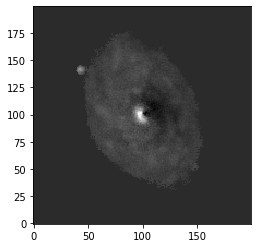

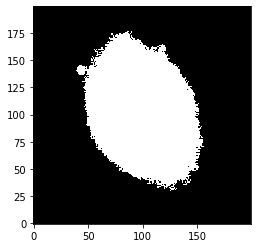

In [15]:
for name in get_galaxy_list():
    print(name)
    diff = sep_diff(name,'r','y')
    #path_d = "/Users/cora-at-work/Desktop/test_{}.fits".format(name)
    #write_fits(path_d,diff)
    break

In [8]:
#TODO:
# 1 - select two bands (first_band & base_band s.t. first_band comes before base_band in bands_in_order_list)
# 2 - pick a galaxy from table 2, read in fits file for first_band and base_band
# 3 - generate (foreground,background) using create_segmentation_mask
# 4 - use fits from #2 and foreground mask from #3 to create diff using create_diff_image
# 5 - Visualize using view_fits (experiment with mask:np.array and std_range:float)

In [9]:
#For example: For IC1683 table 2 (g,r) bands diff would look like: